In [1]:
import pandas as pd
import numpy as np
nls97 = pd.read_csv("data/nls97.csv")

covidtotals = pd.read_csv("data/covidtotals.csv",
  parse_dates=['lastdate'])

In [2]:
nls97.set_index("personid", inplace=True)

In [3]:
nls97.index

Int64Index([100061, 100139, 100284, 100292, 100583, 100833, 100931, 101089,
            101122, 101132,
            ...
            998997, 999031, 999053, 999087, 999103, 999291, 999406, 999543,
            999698, 999963],
           dtype='int64', name='personid', length=8984)

In [4]:
nls97.shape

(8984, 88)

In [5]:
nls97.index.nunique()

8984

In [6]:
nls97.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8984 entries, 100061 to 999963
Data columns (total 88 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   gender                 8984 non-null   object 
 1   birthmonth             8984 non-null   int64  
 2   birthyear              8984 non-null   int64  
 3   highestgradecompleted  6663 non-null   float64
 4   maritalstatus          6672 non-null   object 
 5   childathome            4791 non-null   float64
 6   childnotathome         4791 non-null   float64
 7   wageincome             5091 non-null   float64
 8   weeklyhrscomputer      6710 non-null   object 
 9   weeklyhrstv            6711 non-null   object 
 10  nightlyhrssleep        6706 non-null   float64
 11  satverbal              1406 non-null   float64
 12  satmath                1407 non-null   float64
 13  gpaoverall             6004 non-null   float64
 14  gpaenglish             5798 non-null   float64
 1

In [7]:
nls97.head(2).T

personid,100061,100139
gender,Female,Male
birthmonth,5,9
birthyear,1980,1983
highestgradecompleted,13.0,12.0
maritalstatus,Married,Married
...,...,...
colenroct15,1. Not enrolled,1. Not enrolled
colenrfeb16,1. Not enrolled,1. Not enrolled
colenroct16,1. Not enrolled,1. Not enrolled
colenrfeb17,1. Not enrolled,1. Not enrolled


In [8]:
covidtotals.set_index("iso_code", inplace=True)

In [9]:
covidtotals.index

Index(['AFG', 'ALB', 'DZA', 'AND', 'AGO', 'AIA', 'ATG', 'ARG', 'ARM', 'ABW',
       ...
       'VIR', 'URY', 'UZB', 'VAT', 'VEN', 'VNM', 'ESH', 'YEM', 'ZMB', 'ZWE'],
      dtype='object', name='iso_code', length=210)

In [10]:
covidtotals.shape

(210, 11)

In [11]:
covidtotals.index.nunique()

210

In [12]:
covidtotals.info()

<class 'pandas.core.frame.DataFrame'>
Index: 210 entries, AFG to ZWE
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   lastdate         210 non-null    datetime64[ns]
 1   location         210 non-null    object        
 2   total_cases      210 non-null    int64         
 3   total_deaths     210 non-null    int64         
 4   total_cases_pm   209 non-null    float64       
 5   total_deaths_pm  209 non-null    float64       
 6   population       210 non-null    float64       
 7   pop_density      198 non-null    float64       
 8   median_age       186 non-null    float64       
 9   gdp_per_capita   182 non-null    float64       
 10  hosp_beds        164 non-null    float64       
dtypes: datetime64[ns](1), float64(7), int64(2), object(1)
memory usage: 27.8+ KB


In [13]:
covidtotals.sample(2, random_state=1).T

iso_code,COG,THA
lastdate,2020-06-01 00:00:00,2020-06-01 00:00:00
location,Congo,Thailand
total_cases,611,3081
total_deaths,20,57
total_cases_pm,110.727,44.14
total_deaths_pm,3.624,0.817
population,5518092.0,69799978.0
pop_density,15.405,135.132
median_age,19.0,40.1
gdp_per_capita,4881.406,16277.671


In [14]:
import pandas as pd
import numpy as np
nls97 = pd.read_csv("data/nls97.csv")
nls97.set_index("personid", inplace=True)
nls97.loc[:, nls97.dtypes == 'object'] = \
  nls97.select_dtypes(['object']). \
  apply(lambda x: x.astype('category'))

In [15]:
analysisdemo = nls97['gender']

In [16]:
type(analysisdemo)

pandas.core.series.Series

In [17]:
analysisdemo = nls97[['gender']]

In [18]:
type(analysisdemo)

pandas.core.frame.DataFrame

In [19]:
analysisdemo = nls97.loc[:,['gender']]

In [20]:
type(analysisdemo)

pandas.core.frame.DataFrame

In [21]:
analysisdemo = nls97.iloc[:,[0]]

In [22]:
type(analysisdemo)

pandas.core.frame.DataFrame

In [23]:
analysisdemo = nls97[['gender','maritalstatus',
 'highestgradecompleted']]

In [24]:
analysisdemo.shape

(8984, 3)

In [25]:
analysisdemo.head()

,gender,maritalstatus,highestgradecompleted
personid,,,
100061,Female,Married,13.0
100139,Male,Married,12.0
100284,Male,Never-married,7.0
100292,Male,NaN,NaN
100583,Male,Married,13.0


In [26]:
analysisdemo = nls97.loc[:,['gender','maritalstatus',
 'highestgradecompleted']]

In [27]:
analysisdemo.shape

(8984, 3)

In [28]:
analysisdemo.head()

,gender,maritalstatus,highestgradecompleted
personid,,,
100061,Female,Married,13.0
100139,Male,Married,12.0
100284,Male,Never-married,7.0
100292,Male,NaN,NaN
100583,Male,Married,13.0


In [29]:
keyvars = ['gender','maritalstatus',
 'highestgradecompleted','wageincome',
 'gpaoverall','weeksworked17','colenroct17'] 
analysiskeys = nls97[keyvars]
analysiskeys.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8984 entries, 100061 to 999963
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   gender                 8984 non-null   category
 1   maritalstatus          6672 non-null   category
 2   highestgradecompleted  6663 non-null   float64 
 3   wageincome             5091 non-null   float64 
 4   gpaoverall             6004 non-null   float64 
 5   weeksworked17          6670 non-null   float64 
 6   colenroct17            6734 non-null   category
dtypes: category(3), float64(4)
memory usage: 377.8 KB


In [30]:
analysiswork = nls97.filter(like="weeksworked")
analysiswork.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8984 entries, 100061 to 999963
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   weeksworked00  8603 non-null   float64
 1   weeksworked01  8564 non-null   float64
 2   weeksworked02  8556 non-null   float64
 3   weeksworked03  8490 non-null   float64
 4   weeksworked04  8458 non-null   float64
 5   weeksworked05  8403 non-null   float64
 6   weeksworked06  8340 non-null   float64
 7   weeksworked07  8272 non-null   float64
 8   weeksworked08  8186 non-null   float64
 9   weeksworked09  8146 non-null   float64
 10  weeksworked10  8054 non-null   float64
 11  weeksworked11  7968 non-null   float64
 12  weeksworked12  7747 non-null   float64
 13  weeksworked13  7680 non-null   float64
 14  weeksworked14  7612 non-null   float64
 15  weeksworked15  7389 non-null   float64
 16  weeksworked16  7068 non-null   float64
 17  weeksworked17  6670 non-null   float64
dtypes

In [32]:
analysiscats = nls97.select_dtypes(include=["category"])
analysiscats.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8984 entries, 100061 to 999963
Data columns (total 57 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   gender                 8984 non-null   category
 1   maritalstatus          6672 non-null   category
 2   weeklyhrscomputer      6710 non-null   category
 3   weeklyhrstv            6711 non-null   category
 4   highestdegree          8953 non-null   category
 5   govprovidejobs         1833 non-null   category
 6   govpricecontrols       1859 non-null   category
 7   govhealthcare          1874 non-null   category
 8   govelderliving         1872 non-null   category
 9   govindhelp             1815 non-null   category
 10  govunemp               1811 non-null   category
 11  govincomediff          1775 non-null   category
 12  govcollegefinance      1875 non-null   category
 13  govdecenthousing       1847 non-null   category
 14  govprotectenvironment  1860 non-n

In [33]:
analysisnums = nls97.select_dtypes(include=["number"])
analysisnums.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8984 entries, 100061 to 999963
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   birthmonth             8984 non-null   int64  
 1   birthyear              8984 non-null   int64  
 2   highestgradecompleted  6663 non-null   float64
 3   childathome            4791 non-null   float64
 4   childnotathome         4791 non-null   float64
 5   wageincome             5091 non-null   float64
 6   nightlyhrssleep        6706 non-null   float64
 7   satverbal              1406 non-null   float64
 8   satmath                1407 non-null   float64
 9   gpaoverall             6004 non-null   float64
 10  gpaenglish             5798 non-null   float64
 11  gpamath                5766 non-null   float64
 12  gpascience             5684 non-null   float64
 13  weeksworked00          8603 non-null   float64
 14  weeksworked01          8564 non-null   float64
 1

In [34]:
demo = ['gender','birthmonth','birthyear']
highschoolrecord = ['satverbal','satmath','gpaoverall',
 'gpaenglish','gpamath','gpascience']
govresp = ['govprovidejobs','govpricecontrols',
  'govhealthcare','govelderliving','govindhelp',
  'govunemp','govincomediff','govcollegefinance',
  'govdecenthousing','govprotectenvironment']
demoadult = ['highestgradecompleted','maritalstatus',
  'childathome','childnotathome','wageincome',
  'weeklyhrscomputer','weeklyhrstv','nightlyhrssleep',
  'highestdegree']
weeksworked = ['weeksworked00','weeksworked01',
  'weeksworked02','weeksworked03','weeksworked04',
  'weeksworked14','weeksworked15','weeksworked16',
  'weeksworked17']
colenr = ['colenrfeb97','colenroct97','colenrfeb98',
  'colenroct98','colenrfeb99','colenroct99',
         'colenrfeb15','colenroct15','colenrfeb16',
  'colenroct16','colenrfeb17','colenroct17']

In [35]:
nls97 = nls97[demoadult + demo + highschoolrecord + \
  govresp + weeksworked + colenr]

In [36]:
nls97.dtypes

highestgradecompleted     float64
maritalstatus            category
childathome               float64
childnotathome            float64
wageincome                float64
weeklyhrscomputer        category
weeklyhrstv              category
nightlyhrssleep           float64
highestdegree            category
gender                   category
birthmonth                  int64
birthyear                   int64
satverbal                 float64
satmath                   float64
gpaoverall                float64
gpaenglish                float64
gpamath                   float64
gpascience                float64
govprovidejobs           category
govpricecontrols         category
govhealthcare            category
govelderliving           category
govindhelp               category
govunemp                 category
govincomediff            category
govcollegefinance        category
govdecenthousing         category
govprotectenvironment    category
weeksworked00             float64
weeksworked01 

In [37]:
nls97.head()

,highestgradecompleted,maritalstatus,childathome,childnotathome,wageincome,weeklyhrscomputer,weeklyhrstv,nightlyhrssleep,highestdegree,gender,...,colenrfeb98,colenroct98,colenrfeb99,colenroct99,colenrfeb15,colenroct15,colenrfeb16,colenroct16,colenrfeb17,colenroct17
personid,,,,,,,,,,,,,,,,,,,,,
100061,13.0,Married,4.0,0.0,12500.0,10 hours or more a week,11 to 20 hours a week,6.0,2. High School,Female,...,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled
100139,12.0,Married,2.0,0.0,120000.0,1 to 3 hours a week,3 to 10 hours a week,8.0,2. High School,Male,...,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled
100284,7.0,Never-married,1.0,0.0,58000.0,None,11 to 20 hours a week,7.0,0. None,Male,...,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled
100292,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4. Bachelors,Male,...,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,NaN,NaN,NaN,NaN
100583,13.0,Married,4.0,0.0,30000.0,Less than 1 hour a week,3 to 10 hours a week,6.0,2. High School,Male,...,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled


In [38]:
nls97.filter(regex='income')

,wageincome,govincomediff
personid,,
100061,12500.0,NaN
100139,120000.0,NaN
100284,58000.0,NaN
100292,NaN,NaN
100583,30000.0,NaN
...,...,...
999291,35000.0,NaN
999406,116000.0,NaN
999543,NaN,NaN


In [39]:
import pandas as pd
import numpy as np
nls97 = pd.read_csv("data/nls97.csv")
nls97.set_index("personid", inplace=True)

In [40]:
nls97[1000:1004].T

personid,195884,195891,195970,195996
gender,Male,Male,Female,Female
birthmonth,12,9,3,9
birthyear,1981,1980,1982,1980
highestgradecompleted,NaN,12.0,17.0,NaN
maritalstatus,NaN,Never-married,Never-married,NaN
...,...,...,...,...
colenroct15,NaN,1. Not enrolled,1. Not enrolled,NaN
colenrfeb16,NaN,1. Not enrolled,1. Not enrolled,NaN
colenroct16,NaN,1. Not enrolled,1. Not enrolled,NaN
colenrfeb17,NaN,1. Not enrolled,1. Not enrolled,NaN


In [41]:
nls97[1000:1004:2].T

personid,195884,195970
gender,Male,Female
birthmonth,12,3
birthyear,1981,1982
highestgradecompleted,NaN,17.0
maritalstatus,NaN,Never-married
...,...,...
colenroct15,NaN,1. Not enrolled
colenrfeb16,NaN,1. Not enrolled
colenroct16,NaN,1. Not enrolled
colenrfeb17,NaN,1. Not enrolled


In [42]:
nls97.head(3).T

personid,100061,100139,100284
gender,Female,Male,Male
birthmonth,5,9,11
birthyear,1980,1983,1984
highestgradecompleted,13.0,12.0,7.0
maritalstatus,Married,Married,Never-married
...,...,...,...
colenroct15,1. Not enrolled,1. Not enrolled,1. Not enrolled
colenrfeb16,1. Not enrolled,1. Not enrolled,1. Not enrolled
colenroct16,1. Not enrolled,1. Not enrolled,1. Not enrolled
colenrfeb17,1. Not enrolled,1. Not enrolled,1. Not enrolled


In [43]:
nls97.tail(3).T

personid,999543,999698,999963
gender,Female,Female,Female
birthmonth,8,5,9
birthyear,1984,1983,1982
highestgradecompleted,12.0,12.0,17.0
maritalstatus,Divorced,Never-married,Married
...,...,...,...
colenroct15,1. Not enrolled,1. Not enrolled,1. Not enrolled
colenrfeb16,1. Not enrolled,1. Not enrolled,1. Not enrolled
colenroct16,1. Not enrolled,1. Not enrolled,1. Not enrolled
colenrfeb17,1. Not enrolled,1. Not enrolled,1. Not enrolled


In [44]:
nls97[-3:].T

personid,999543,999698,999963
gender,Female,Female,Female
birthmonth,8,5,9
birthyear,1984,1983,1982
highestgradecompleted,12.0,12.0,17.0
maritalstatus,Divorced,Never-married,Married
...,...,...,...
colenroct15,1. Not enrolled,1. Not enrolled,1. Not enrolled
colenrfeb16,1. Not enrolled,1. Not enrolled,1. Not enrolled
colenroct16,1. Not enrolled,1. Not enrolled,1. Not enrolled
colenrfeb17,1. Not enrolled,1. Not enrolled,1. Not enrolled


In [45]:
nls97.loc[[195884,195891,195970]].T

personid,195884,195891,195970
gender,Male,Male,Female
birthmonth,12,9,3
birthyear,1981,1980,1982
highestgradecompleted,NaN,12.0,17.0
maritalstatus,NaN,Never-married,Never-married
...,...,...,...
colenroct15,NaN,1. Not enrolled,1. Not enrolled
colenrfeb16,NaN,1. Not enrolled,1. Not enrolled
colenroct16,NaN,1. Not enrolled,1. Not enrolled
colenrfeb17,NaN,1. Not enrolled,1. Not enrolled


In [46]:
nls97.loc[195884:195970].T

personid,195884,195891,195970
gender,Male,Male,Female
birthmonth,12,9,3
birthyear,1981,1980,1982
highestgradecompleted,NaN,12.0,17.0
maritalstatus,NaN,Never-married,Never-married
...,...,...,...
colenroct15,NaN,1. Not enrolled,1. Not enrolled
colenrfeb16,NaN,1. Not enrolled,1. Not enrolled
colenroct16,NaN,1. Not enrolled,1. Not enrolled
colenrfeb17,NaN,1. Not enrolled,1. Not enrolled


In [47]:
nls97.iloc[[0]].T

personid,100061
gender,Female
birthmonth,5
birthyear,1980
highestgradecompleted,13.0
maritalstatus,Married
...,...
colenroct15,1. Not enrolled
colenrfeb16,1. Not enrolled
colenroct16,1. Not enrolled
colenrfeb17,1. Not enrolled


In [48]:
nls97.iloc[[0,1,2]].T

personid,100061,100139,100284
gender,Female,Male,Male
birthmonth,5,9,11
birthyear,1980,1983,1984
highestgradecompleted,13.0,12.0,7.0
maritalstatus,Married,Married,Never-married
...,...,...,...
colenroct15,1. Not enrolled,1. Not enrolled,1. Not enrolled
colenrfeb16,1. Not enrolled,1. Not enrolled,1. Not enrolled
colenroct16,1. Not enrolled,1. Not enrolled,1. Not enrolled
colenrfeb17,1. Not enrolled,1. Not enrolled,1. Not enrolled


In [49]:
nls97.iloc[0:3].T

personid,100061,100139,100284
gender,Female,Male,Male
birthmonth,5,9,11
birthyear,1980,1983,1984
highestgradecompleted,13.0,12.0,7.0
maritalstatus,Married,Married,Never-married
...,...,...,...
colenroct15,1. Not enrolled,1. Not enrolled,1. Not enrolled
colenrfeb16,1. Not enrolled,1. Not enrolled,1. Not enrolled
colenroct16,1. Not enrolled,1. Not enrolled,1. Not enrolled
colenrfeb17,1. Not enrolled,1. Not enrolled,1. Not enrolled


In [50]:
nls97.iloc[[-3,-2,-1]].T

personid,999543,999698,999963
gender,Female,Female,Female
birthmonth,8,5,9
birthyear,1984,1983,1982
highestgradecompleted,12.0,12.0,17.0
maritalstatus,Divorced,Never-married,Married
...,...,...,...
colenroct15,1. Not enrolled,1. Not enrolled,1. Not enrolled
colenrfeb16,1. Not enrolled,1. Not enrolled,1. Not enrolled
colenroct16,1. Not enrolled,1. Not enrolled,1. Not enrolled
colenrfeb17,1. Not enrolled,1. Not enrolled,1. Not enrolled


In [51]:
nls97.nightlyhrssleep.quantile(0.05)

4.0

In [52]:
nls97.nightlyhrssleep.count()

6706

In [53]:
sleepcheckbool = nls97.nightlyhrssleep<=4

In [54]:
sleepcheckbool

personid
100061    False
100139    False
100284    False
100292    False
100583    False
          ...  
999291    False
999406    False
999543    False
999698    False
999963    False
Name: nightlyhrssleep, Length: 8984, dtype: bool

In [55]:
lowsleep = nls97.loc[sleepcheckbool]

In [56]:
lowsleep.shape

(364, 88)

In [57]:
lowsleep.childathome.describe()

count    293.000000
mean       1.788396
std        1.400685
min        0.000000
25%        1.000000
50%        2.000000
75%        3.000000
max        9.000000
Name: childathome, dtype: float64

In [58]:
lowsleep3pluschildren = nls97.loc[(nls97.nightlyhrssleep<=4) & (nls97.childathome>=3)]

In [59]:
lowsleep3pluschildren.shape

(82, 88)

In [60]:
lowsleep3pluschildren = nls97.loc[(nls97.nightlyhrssleep<=4) & (nls97.childathome>=3), ['nightlyhrssleep','childathome']]

In [61]:
lowsleep3pluschildren

,nightlyhrssleep,childathome
personid,,
119754,4.0,4.0
141531,4.0,5.0
152706,4.0,4.0
156823,1.0,3.0
158355,4.0,4.0
...,...,...
905774,4.0,3.0
907315,4.0,3.0
955166,3.0,3.0


In [1]:
import pandas as pd
nls97 = pd.read_csv("data/nls97.csv")
nls97.set_index("personid", inplace=True)
nls97.loc[:, nls97.dtypes == 'object'] = \
  nls97.select_dtypes(['object']). \
  apply(lambda x: x.astype('category'))

In [2]:
catcols = nls97.select_dtypes(include=["category"]).columns

In [3]:
nls97[catcols].isnull().sum()

gender                      0
maritalstatus            2312
weeklyhrscomputer        2274
weeklyhrstv              2273
highestdegree              31
govprovidejobs           7151
govpricecontrols         7125
govhealthcare            7110
govelderliving           7112
govindhelp               7169
govunemp                 7173
govincomediff            7209
govcollegefinance        7109
govdecenthousing         7137
govprotectenvironment    7124
colenrfeb97              7734
colenroct97               483
colenrfeb98               483
colenroct98                96
colenrfeb99               119
colenroct99               133
colenrfeb00               164
colenroct00               179
colenrfeb01               198
colenroct01               226
colenrfeb02               252
colenroct02               286
colenrfeb03               326
colenroct03               362
colenrfeb04               406
colenroct04               438
colenrfeb05               476
colenroct05               513
colenrfeb0

In [4]:
nls97.maritalstatus.value_counts()

Married          3066
Never-married    2766
Divorced          663
Separated         154
Widowed            23
Name: maritalstatus, dtype: int64

In [5]:
nls97.maritalstatus.value_counts(sort=False)

Divorced          663
Married          3066
Never-married    2766
Separated         154
Widowed            23
Name: maritalstatus, dtype: int64

In [6]:
nls97.maritalstatus.value_counts(sort=False, normalize=True)

Divorced         0.099371
Married          0.459532
Never-married    0.414568
Separated        0.023082
Widowed          0.003447
Name: maritalstatus, dtype: float64

In [7]:
nls97.filter(like="gov").apply(pd.value_counts, normalize=True)

,govprovidejobs,govpricecontrols,govhealthcare,govelderliving,govindhelp,govunemp,govincomediff,govcollegefinance,govdecenthousing,govprotectenvironment
1. Definitely,0.247681,0.541689,0.665422,0.700321,0.428650,0.218112,0.324507,0.734400,0.442339,0.668817
2. Probably,0.336607,0.334051,0.271078,0.247863,0.411019,0.403092,0.284507,0.230400,0.433676,0.286559
3. Probably not,0.252046,0.086606,0.045358,0.037927,0.119008,0.262838,0.228732,0.026667,0.100162,0.029570
4. Definitely not,0.163666,0.037655,0.018143,0.013889,0.041322,0.115958,0.162254,0.008533,0.023822,0.015054


In [8]:
nls97[nls97.maritalstatus=="Married"].\
filter(like="gov").\
apply(pd.value_counts, normalize=True)

,govprovidejobs,govpricecontrols,govhealthcare,govelderliving,govindhelp,govunemp,govincomediff,govcollegefinance,govdecenthousing,govprotectenvironment
1. Definitely,0.173315,0.459864,0.564450,0.632293,0.372549,0.147265,0.258890,0.695418,0.356354,0.644505
2. Probably,0.328748,0.380952,0.359566,0.310719,0.445378,0.395512,0.273115,0.261456,0.493094,0.313433
3. Probably not,0.314993,0.112925,0.051560,0.037992,0.142857,0.328191,0.284495,0.033693,0.120166,0.028494
4. Definitely not,0.182944,0.046259,0.024423,0.018996,0.039216,0.129032,0.183499,0.009434,0.030387,0.013569


In [11]:
freqout = open('views/frequencies.txt', 'w') 

for col in nls97.select_dtypes(include=["category"]):
  print(col, "----------------------", "frequencies",
  nls97[col].value_counts(sort=False),"percentages",
  nls97[col].value_counts(normalize=True, sort=False),
  sep="\n\n", end="\n\n\n", file=freqout)

In [10]:
freqout.close()



In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
covidtotals = pd.read_csv("data/covidtotals.csv",
  parse_dates=['lastdate'])
covidtotals.set_index("iso_code", inplace=True)

In [13]:
covidtotals.shape

(210, 11)

In [14]:
covidtotals.sample(2, random_state=1).T

iso_code,COG,THA
lastdate,2020-06-01 00:00:00,2020-06-01 00:00:00
location,Congo,Thailand
total_cases,611,3081
total_deaths,20,57
total_cases_pm,110.727,44.14
total_deaths_pm,3.624,0.817
population,5518092.0,69799978.0
pop_density,15.405,135.132
median_age,19.0,40.1
gdp_per_capita,4881.406,16277.671


In [15]:
covidtotals.dtypes

lastdate           datetime64[ns]
location                   object
total_cases                 int64
total_deaths                int64
total_cases_pm            float64
total_deaths_pm           float64
population                float64
pop_density               float64
median_age                float64
gdp_per_capita            float64
hosp_beds                 float64
dtype: object

In [16]:
covidtotals.describe()

,total_cases,total_deaths,total_cases_pm,total_deaths_pm,population,pop_density,median_age,gdp_per_capita,hosp_beds
count,2.100000e+02,210.000000,209.000000,209.000000,2.100000e+02,198.000000,186.000000,182.000000,164.000000
mean,2.921614e+04,1770.714286,1361.842909,55.925440,3.694276e+07,362.867434,30.627957,19539.154588,3.012671
std,1.363978e+05,8705.565857,2629.894101,145.081876,1.425092e+08,1581.438294,9.133152,19862.354091,2.464917
min,0.000000e+00,0.000000,0.894000,0.000000,8.090000e+02,0.137000,15.100000,661.240000,0.100000
25%,1.757500e+02,4.000000,96.785000,0.893000,1.031042e+06,37.416000,22.250000,4485.329000,1.300000
50%,1.242500e+03,25.500000,281.997000,6.214000,6.909866e+06,87.250000,30.250000,13183.081500,2.358500
75%,1.011700e+04,241.250000,1803.318000,32.158000,2.615868e+07,214.122000,39.000000,28556.527250,3.895750
max,1.790191e+06,104383.000000,19771.348000,1237.551000,1.439324e+09,19347.500000,48.200000,116935.600000,13.800000


In [17]:
totvars = ['location','total_cases','total_deaths',
  'total_cases_pm','total_deaths_pm']

In [20]:
covidtotals[totvars].quantile(np.arange(0.0, 1.1, 0.1))

,total_cases,total_deaths,total_cases_pm,total_deaths_pm
0.0,0.0,0.0,0.8940,0.0000
0.1,22.9,0.0,18.4870,0.0000
0.2,105.2,2.0,56.7386,0.4008
0.3,302.0,6.7,118.2282,1.7348
0.4,762.0,12.0,214.9182,3.9734
0.5,1242.5,25.5,281.9970,6.2140
0.6,2514.6,54.6,546.0534,12.5644
0.7,6959.8,137.2,1074.0324,26.0638
0.8,16847.2,323.2,2208.7374,50.2896
0.9,46513.1,1616.9,3771.9956,139.5290


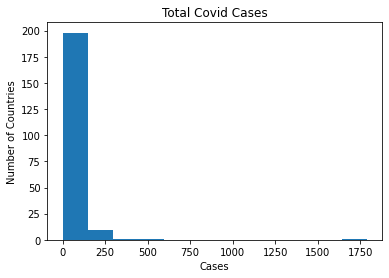

In [21]:
plt.hist(covidtotals['total_cases']/1000, bins=12)
plt.title("Total Covid Cases")
plt.xlabel('Cases')
plt.ylabel("Number of Countries")
plt.show()